<a href="https://colab.research.google.com/github/vanshika2424/VisaApprovalPredictor/blob/main/VisaApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Context
Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

# Objective
In FY 2016, the Office of Foreign Labor Certification (OFLC) processed over 775,000 employer applications for nearly 1.7 million positions—marking a 9% increase from the previous year. With the volume of visa applications rising steadily, manual review processes are becoming inefficient and time-consuming.

This project aims to develop a machine learning-based classification model that:

Predicts the likelihood of visa approval for applicants based on historical data.

Identifies key factors influencing visa certification outcomes.

Recommends applicant profiles that are most likely to be certified or denied.

The ultimate goal is to assist immigration authorities in streamlining the decision-making process, enabling faster and more data-driven visa approvals.



# Data Description
The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

*   **case_id:** ID of each visa application
*  **continent:** Information of continent the employee
*   **education_of_employee:** Information of education of the employee
*   **has_job_experience:** Does the employee has any job experience? Y= Yes; N = No
*   **requires_job_training:** Does the employee require any job training? Y = Yes; N = No
*   **no_of_employees:** Number of employees in the employer's company
*   **yr_of_estab:** Year in which the employer's company was established
*   **region_of_employment:** Information of foreign worker's intended region of employment in the US.
*   **prevailing_wage:** Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
*  ** unit_of_wage:** Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
*   **full_time_position:** Is the position of work full-time? Y = Full Time Position; N = Part Time Position
*   **case_status:** Flag indicating if the Visa was certified or denied








# Importing the necessary libraries

In [5]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Library to split data
from sklearn.model_selection import train_test_split
# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [6]:
# Uncomment and execute the code snippets below if the data is stored in Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
visa = pd.read_csv('/content/EasyVisa.csv')

In [8]:

data = visa.copy()

# Overview of the Dataset

**View the first and last 5 rows of the dataset**

In [9]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [10]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


**Understand the shape of the dataset**

In [11]:


 print ('There are', data.shape[0], 'rows and ', data.shape[1], 'columns or attributes')

There are 25480 rows and  12 columns or attributes


**Check the data types of the columns for the dataset**

In [12]:
data.info()

## Observations:
## There are no null values in the data.
## case_status is the target for classification (e.g., approved/denied).
## Convert it in binary or multi-class by checking unique values.
## Case ID is non-informative → Drop it

## Categorical variables → Must be encoded before training

## Scaling: Apply StandardScaler or MinMaxScaler to numeric features

## Class imbalance: Check distribution of case_status before modeling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [13]:
# checking for duplicate values
data.isnull().sum() ##  Complete the code to check duplicate entries in the data

## Observation: No missing values (as per non-null count = 25,480 for all columns) .

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [14]:
# checking for duplicate values


duplicate_ids = data.duplicated(subset=['case_id'], keep=False)


data2 = data['case_id'].value_counts()
print(data2)
# Show the number of unique IDs
data2_count = data2.count()
print(data2_count)

## Observation: There are no duplicate IDs

case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
25480


# Exploratory Data Analysis (EDA)

**Let's check the statistical summary of the data**

In [15]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Fixing the negative values in number of employees columns**

In [16]:
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

In [17]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

**Let's check the count of each unique category in each of the categorical variables**

In [18]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [19]:
# checking the number of unique values
data["case_id"].nunique() ## check unique values in the mentioned column

25480

In [20]:
data.drop(["case_id"], axis=1, inplace=True) ## drop 'case_id' column from the data

# **Univariate Analysis**

In [21]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Observations on education of employee**

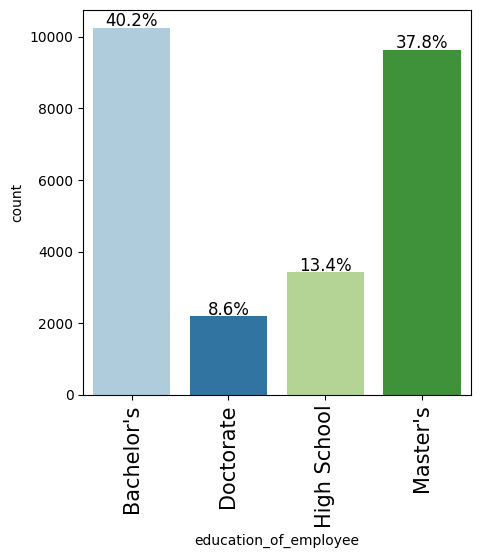

In [23]:
labeled_barplot(data, "education_of_employee", perc=True)

**Observations on region of employment**

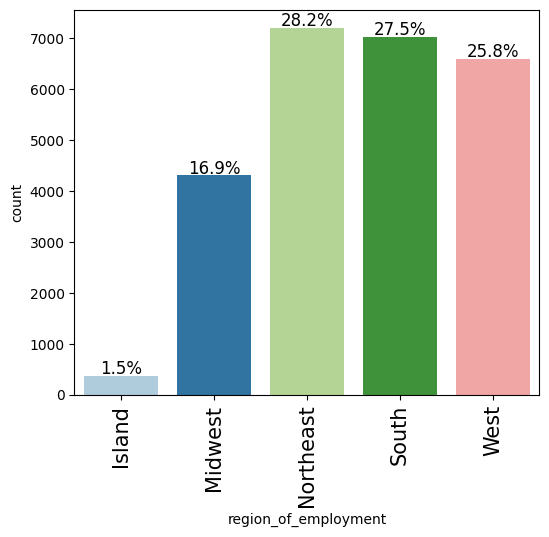

In [24]:
labeled_barplot(data,"region_of_employment",perc=True)  ## create labeled_barplot for region of employment

**Observations on job experience**

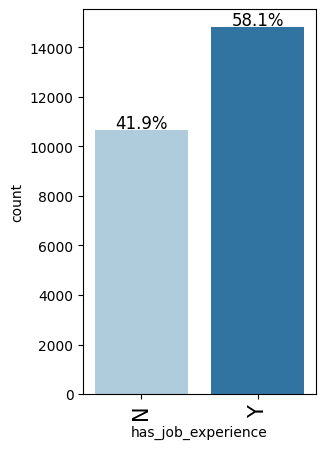

In [25]:
labeled_barplot(data,"has_job_experience",perc=True) ## labeled_barplot for job experience

**Observations on case status**

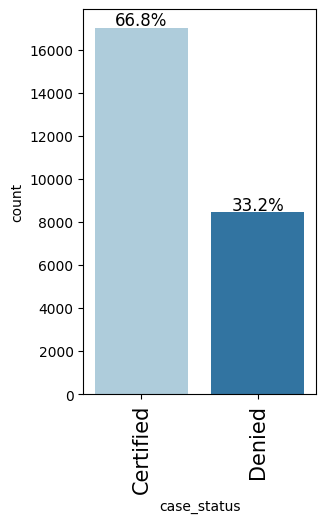

In [26]:
labeled_barplot(data,"case_status",perc=True) ## create labeled_barplot for case status

# **# Bivariate Analysis**

**Correlation Check**

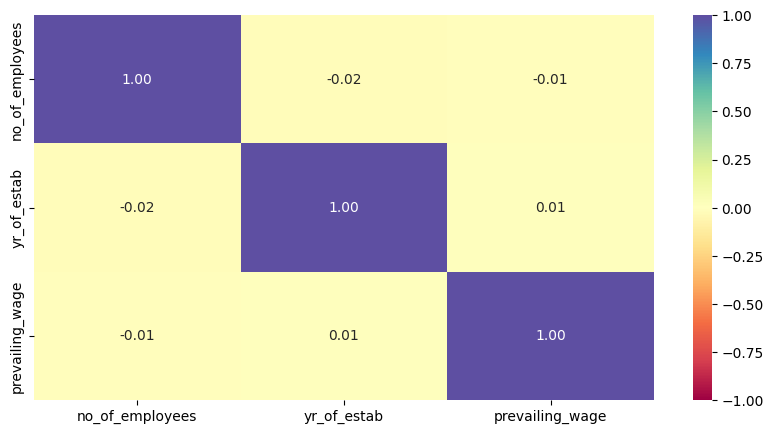

In [27]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

##Observation Neither positive nor negative correlation → the variables are mostly independent in linear terms.
          ##  −0.01/-0.02 is very weak and almost negligible
          ## This does not rule out non-linear relationships, but no strong trend is evident
          ##  0.01 indicates no significant linear relationship

**Creating functions that will help us with further analysis.**

In [28]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [29]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# **Does higher education increase the chances of visa certification for well-paid jobs abroad?**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


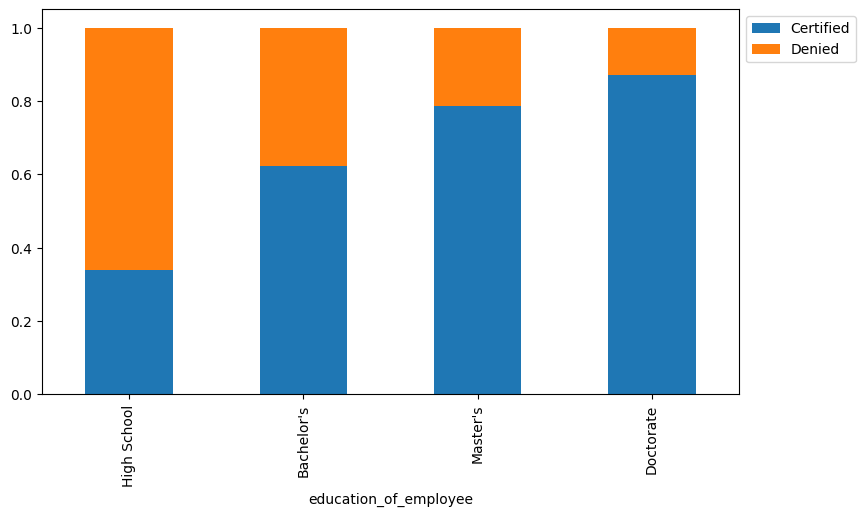

In [30]:
stacked_barplot(data, "education_of_employee", "case_status")

Observations

1. Master’s and Bachelor’s degrees have higher approval (Certified) rates.

2. High School applicants are more often denied than certified.

3. Doctorate holders have a very high approval rate (small bar segment for Denied).

4. higher education correlates with higher approval.




# **How does visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


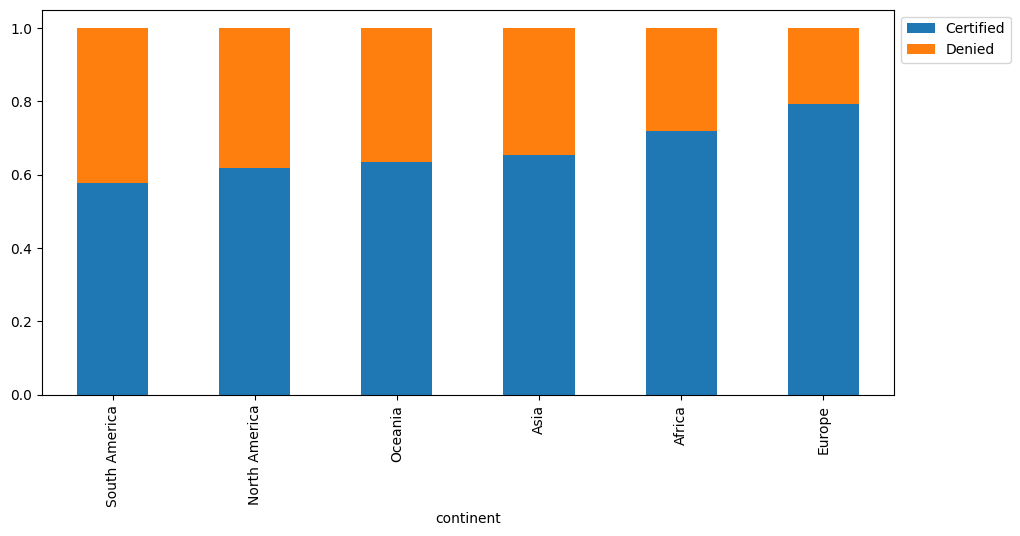

In [31]:
stacked_barplot(data,"continent","case_status")  ## code to plot stacked barplot for continent and case status

# **Key Observations:**
Europe has the highest approval rate (~79%), even though total applications are lower than Asia.

Asia has the most cases overall, and its approval rate (~65%) is close to the global average.

South America has the lowest approval rate (~58%) among all continents.

Africa and Oceania, while having fewer cases, show relatively strong approval rates.

The global average approval rate is about 66.8%.

In [32]:
data3 = {
    'Continent': ['Asia', 'North America', 'Europe', 'South America', 'Africa', 'Oceania', 'All'],
    'Certified': [11012, 2037, 2957, 493, 397, 122, 17018],
    'Denied': [5849, 1255, 775, 359, 154, 70, 8462],
    'Total': [16861, 3292, 3732, 852, 551, 192, 25480]
}

df = pd.DataFrame(data3)


df['Approval Rate (%)'] = (df['Certified'] / df['Total']) * 100
df['Approval Rate (%)'] = df['Approval Rate (%)'].round(1)  # Round to one decimal


print(df)

       Continent  Certified  Denied  Total  Approval Rate (%)
0           Asia      11012    5849  16861               65.3
1  North America       2037    1255   3292               61.9
2         Europe       2957     775   3732               79.2
3  South America        493     359    852               57.9
4         Africa        397     154    551               72.1
5        Oceania        122      70    192               63.5
6            All      17018    8462  25480               66.8


# **Does having prior work experience influence the chances of visa certification for career opportunities abroad?**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


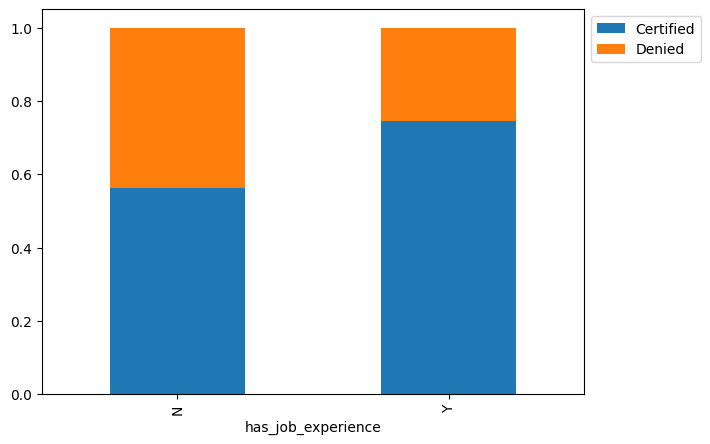

In [33]:
stacked_barplot(data,"has_job_experience","case_status") ## code to plot stacked barplot for case status and job experience

More applicants had prior job experience than not:

14,802 applicants had job experience (Y), while 10,678 did not (N).

Certified cases are mostly from experienced applicants:

Of the 17,018 certified cases, 11,024 had prior job experience.

Denied cases are more balanced between experience levels:

Out of 8,462 denials, 4,684 were from applicants without experience, and 3,778 from those with experience.

Job experience appears more frequently among approved applications:

The majority of certified cases had job experience, while denials were more evenly split.

The dataset contains a clear divide in job experience:

The difference in outcomes between experienced and non-experienced applicants is visibly reflected in the counts.

# **Is the prevailing wage consistent across all regions of the US?**

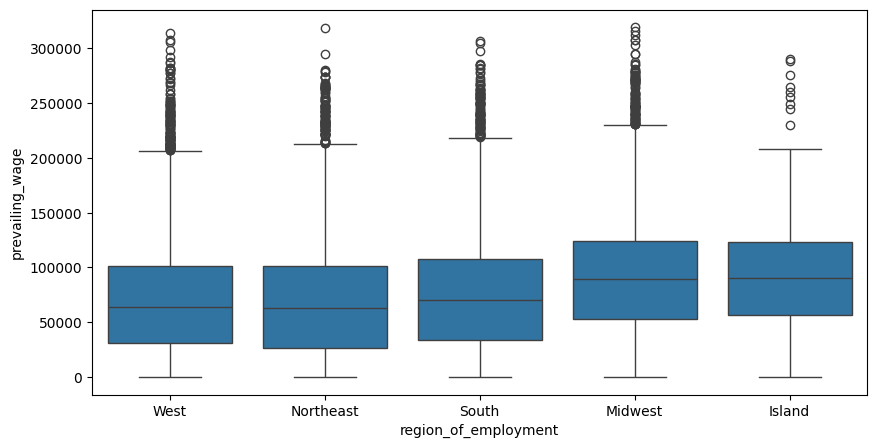

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage") ## code to create boxplot for region of employment and prevailing wage
plt.show()

 Distribution of prevailing wages across different regions of employment. Here are some key observations:

Median Wages Are Similar Across Regions:

The medians are relatively close, indicating similar central tendencies of wages across all regions.

Outliers Are Prevalent in All Regions:

All regions show a significant number of outliers , suggesting the presence of higher wage positions in each region.

Wider Spread in the "South" and "West":

The interquartile range (IQR, the height of the box) is somewhat larger for the South and West, indicating more wage variability in those regions.

Right-Skewed Distributions:

Whiskers and outliers extend much more on the upper end than the lower end, indicating right-skewed distributions (i.e., some very high wages).

"Total" Category Follows Similar Pattern:

The “Total” category aggregates the data and shows a distribution similar to the individual regions, validating consistency.

# **# Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?**

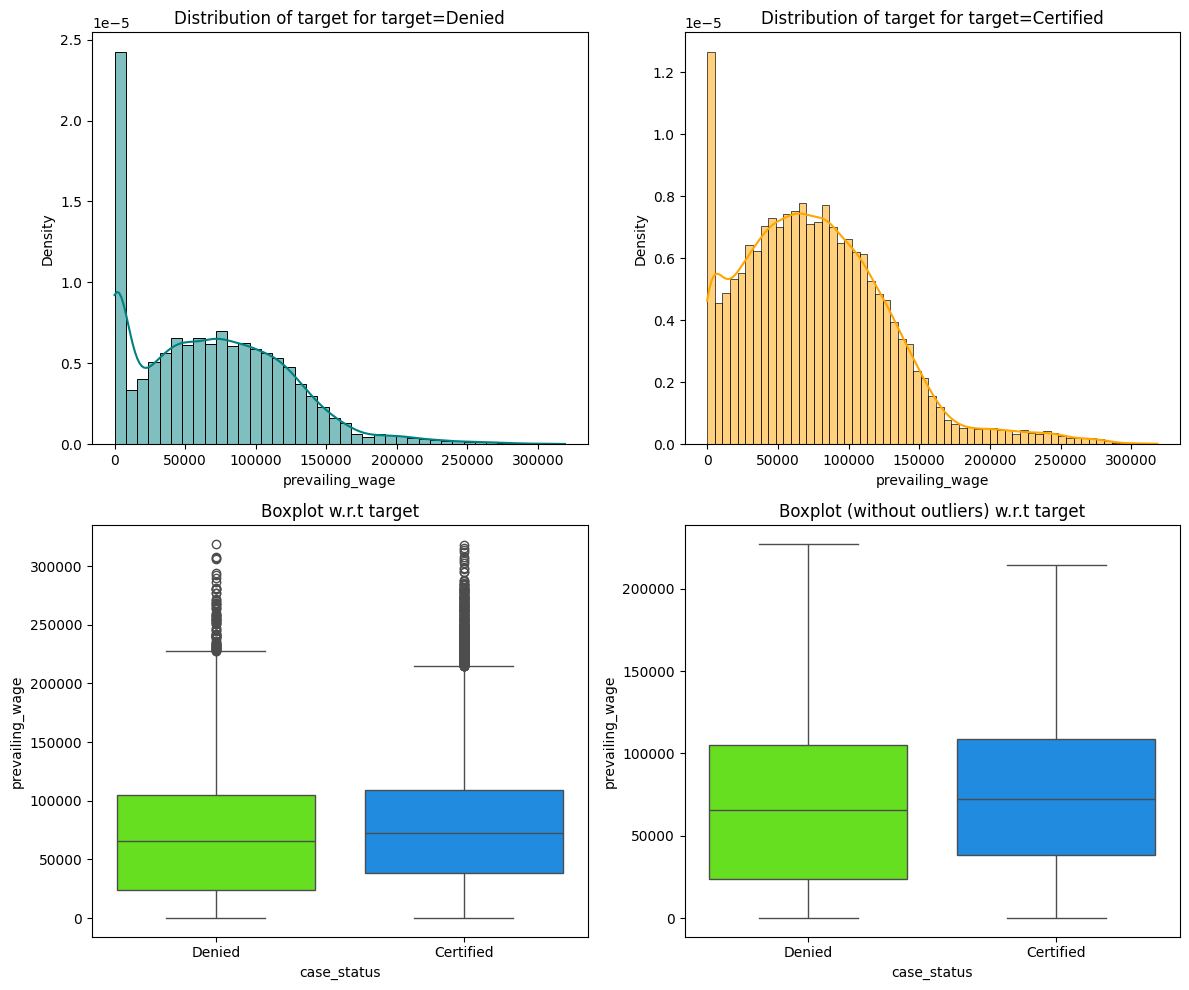

In [35]:
distribution_plot_wrt_target(data=data, predictor="prevailing_wage", target="case_status") ## code to find distribution of prevailing wage and case status

**Top Row: **
# **Distribution Plots**
# Left Plot (Certified Applications):

The distribution of prevailing wages for certified applications is right-skewed.

Most wages cluster in the lower range (around $60,000–$100,000), with a long tail indicating some very high-wage certifications.

The distribution is smoother and more concentrated than the denied group.

# Right Plot (Denied Applications):

The distribution is also right-skewed but more spread out and flatter than the certified group.

Denied applications tend to have a wider range of wages, with more lower and very high wage cases.

Bottom Row:

# **Boxplots**
# Left Boxplot (Certified vs Denied - side-by-side):

The median prevailing wage is higher for certified applications than for denied ones.

Certified applications also have a narrower IQR, indicating more consistent wage offers.

Denied applications have more outliers on both ends, suggesting less consistency.

# Right Boxplot (Colored Comparison):

Reinforces the same observation: certified applications tend to offer higher and more consistent wages, while denied applications are more variable and skew lower.

Overall Insights:
Higher prevailing wages are associated with a greater likelihood of certification.

Denied applications tend to be more inconsistent in wage levels and show more variation.

Employers offering competitive wages likely have a better chance at visa certification.

# **Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


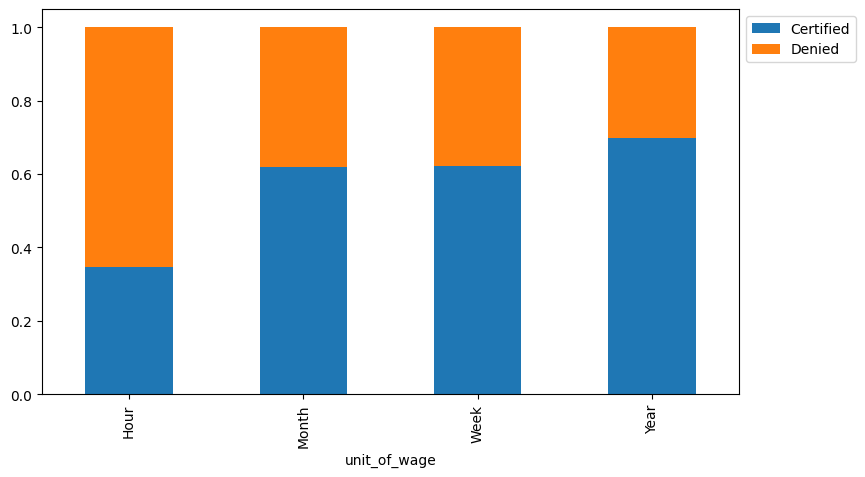

In [36]:
stacked_barplot(data,"unit_of_wage","case_status") ## Complete the code to plot stacked barplot for unit of wage and case status

**1.Yearly wage unit dominates the dataset (over 90% of all applications) and has a stronger certification rate:**

Most certified applications (16,047) report wages in Yearly terms.

Yearly unit appears more standard and may align better with expected documentation or job roles.

**2. Hourly wage cases face more denials than certifications:**

747 certified vs. 1,410 denied — nearly twice as many denials.

This may reflect lower-wage roles, temporary/hourly contracts, or greater scrutiny.

**3. Weekly and Monthly units are rare and mixed in outcome:**

Due to small counts (272 and 89), it’s hard to generalize, but they show a more balanced or slightly favorable certification.

## **Data Pre-processing**

# **Outlier Check**

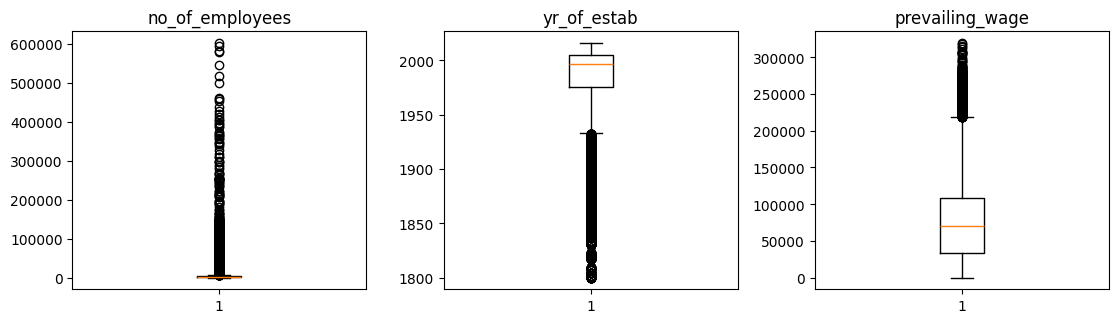

In [37]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**1. Number of Employees**
Right-skewed distribution with many outliers.

Most employers have a relatively small workforce, while a few have extremely large employee counts.

Suggests that smaller companies also participate in H-1B sponsorship, though large ones dominate the upper extremes.

**2. yr_of_estab (Year of Establishment)**
The values are fairly clustered, with no IQR (box is almost a line), meaning many companies were established in a narrow range of years.

A long upper whisker with dense outliers on the high end suggests that while many companies are older, a good number are newer startups.

Implies that both mature and newer companies are applying for H-1B visas.

**3. Prevailing Wage**
Similar to earlier findings: right-skewed, with most wages clustered in the $60,000–$100,000 range.

Numerous high-wage outliers, indicating a few high-paying jobs skew the wage distribution

# Data Preparation for modeling
We want to predict which visa will be certified.
Before we proceed to build a model, we'll have to encode categorical features.
We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [38]:
# Encode target
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# Drop target and identifier
X = data.drop(['case_status'], axis=1)
y = data["case_status"]

# Encode categoricals
X = pd.get_dummies(X, drop_first=True)

# Train-validation split (70:30)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Validation-test split (90:10)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=0.1, random_state=1, stratify=y_val
)

print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))


Shape of Training set :  (17836, 21)
Shape of Validation set :  (6879, 21)
Shape of test set :  (765, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.66783
0    0.33217
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667974
0    0.332026
Name: proportion, dtype: float64


# Data split completed successfully!

Shapes
Training set: (17,836, 21)

Validation set: (6,879, 21)

Test set: (765, 21)

### **Model Building**
## Model Evaluation Criterion


1.   Choose the primary metric to evaluate the model on
2.   Elaborate on the rationale behind choosing the metric


First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

*   The model_performance_classification_sklearn function will be used to check the model performance of models.
*   The confusion_matrix_sklearn function will be used to plot the confusion matrix.





# ANSWER
Primary Metric: F1-score
Why?
We care about both precision (correctly identifying strong cases) and recall (not missing strong cases).

F1-score balances these two and is robust for imbalanced classes.

Additionally, we can track Precision, Recall, and ROC-AUC as secondary metrics for a fuller picture.

Metric	Usage
F1-score	Primary evaluation metric
Precision & Recall	Secondary insights

In [39]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """


    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [40]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## **Defining scorer to be used for cross-validation and hyperparameter tuning**

In [41]:
scorer = metrics.make_scorer(metrics.recall_score)
scorer = metrics.make_scorer(metrics.precision_score)
scorer = metrics.make_scorer(metrics.accuracy_score)
scorer = metrics.make_scorer(metrics.f1_score) ## Complete the code to define the metric

## Possible metrics are [recall_score,f1_score,accuracy_score,precision_score]
## For example, metrics.precision_score

## **Model building with Original data**

In [42]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)



    scores = f1_score(y_val, model.predict(X_val))

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7756586246579394
Random forest: 0.8037837241749051
GBM: 0.823039791269532
Adaboost: 0.8203377989495703
Xgboost: 0.8073583989766158
dtree: 0.7410652876513099

Validation Performance:

Bagging: 0.7675817565350541
Random forest: 0.7972364702187794
GBM: 0.8195818459969403
Adaboost: 0.8158053488839735
Xgboost: 0.8070320579110651
dtree: 0.7477497255762898


Gradient Boosting (GBM) shows the best average F1 score on the training data.

XGBoost and Decision Trees underperform compared to the ensemble models like GBM, Random Forest, and AdaBoost.

All ensemble methods outperform the single decision tree, which is expected due to reduced variance.

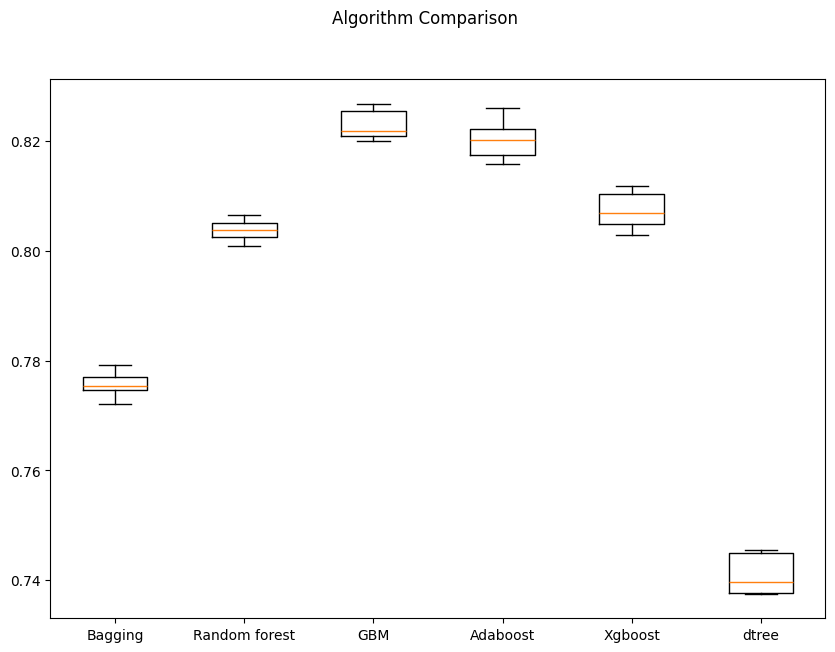

In [43]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names)
plt.show()

Gradient Boosting shows the highest and most stable performance, making it the best model for predicting visa approvals.

Boosting algorithms (Gradient Boosting, AdaBoost, XGBoost) outperform simpler models, capturing complex applicant patterns effectively.

Low variance in models like GBM and XGBoost indicates consistent and reliable performance across different data splits.

Decision Tree performs the worst and is not suitable for production due to low accuracy and high variability.

# **Model Building with Oversampled data**

Before OverSampling, counts of label '1': 11913
Before OverSampling, counts of label '0': 5923 

After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 11913 

After OverSampling, the shape of train_X: (23826, 21)
After OverSampling, the shape of train_y: (23826,) 


Cross-Validation performance on training dataset:

Bagging: 0.7553714301070087
Random forest: 0.7935193362866556
GBM: 0.8076949280007495
Adaboost: 0.8013161599972107
Xgboost: 0.799430071068073
dtree: 0.7236479557474234

Validation Performance:

Bagging: 0.7606724176067242
Random forest: 0.7953896584540552
GBM: 0.8125259228535877
Adaboost: 0.8120255086547221
Xgboost: 0.8039950062421972
dtree: 0.7387687188019967


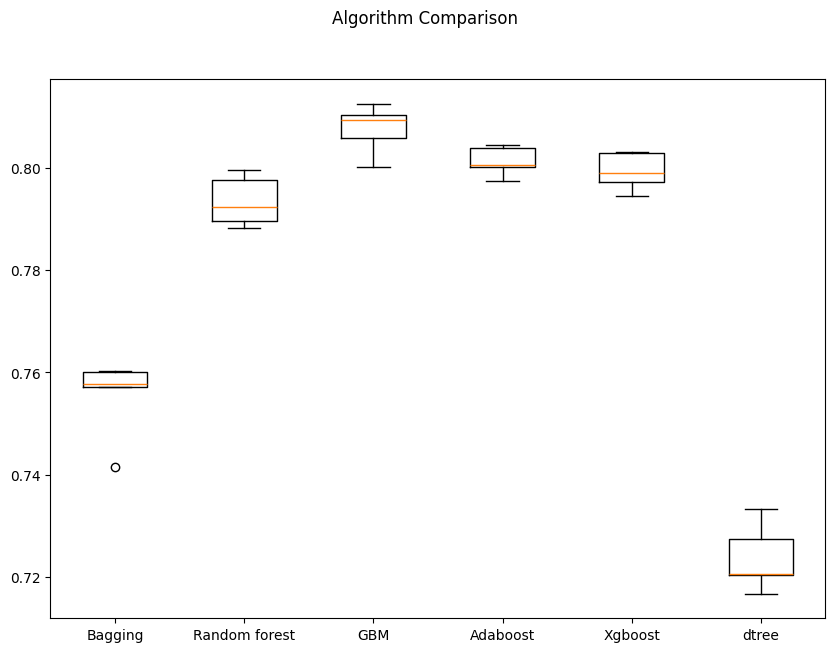

In [44]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
# the k-nearest neighbors
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))
print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

models = [] # Empty list to store all the models
# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = [] # Empty list to store all model&#39;s CV scores
names = [] # Empty list to store name of the models
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")
for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names)
plt.show()


**Class imbalance resolved:**



Certified (1): 11,913 → 11,913

Denied (0): 5,923 → 11,913 (balanced using SMOTE)

**Training data size increased:**

From 17,836 → 23,826 samples

**Cross-Validation F1-Scores (Training set):**

GBM: 0.808 (highest)

Adaboost: 0.801

XGBoost: 0.799

Random Forest: 0.794

Bagging: 0.755

Decision Tree: 0.724

**Validation Set F1-Scores (Unbalanced real-world data):**

GBM: 0.813 (highest)

Adaboost: 0.812

XGBoost: 0.804

Random Forest: 0.795

Bagging: 0.761

Decision Tree: 0.739

**Top performer:**

GBM performed best overall on both training and validation sets.

Ensemble methods (GBM, Adaboost, XGBoost) clearly outperform basic models.

Decision Tree and Bagging showed weaker results, hence not recommended.



## **Model Building with Undersampled data**

Before UnderSampling, counts of label '1': 11913
Before UnderSampling, counts of label '0': 5923 

After UnderSampling, counts of label '1': 5923
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (11846, 21)
After UnderSampling, the shape of train_y: (11846,) 


Cross-Validation performance on training dataset:

Bagging: 0.6411413525524321
Random forest: 0.6875011408129813
GBM: 0.7131358906535971
Adaboost: 0.6949405744215158
Xgboost: 0.6944693136408734
dtree: 0.617022679979161

Validation Performance:

Bagging: 0.6916956737941323
Random forest: 0.734144015259895
GBM: 0.7608695652173914
Adaboost: 0.7604202747950584
Xgboost: 0.7423652871123688
dtree: 0.6839080459770115


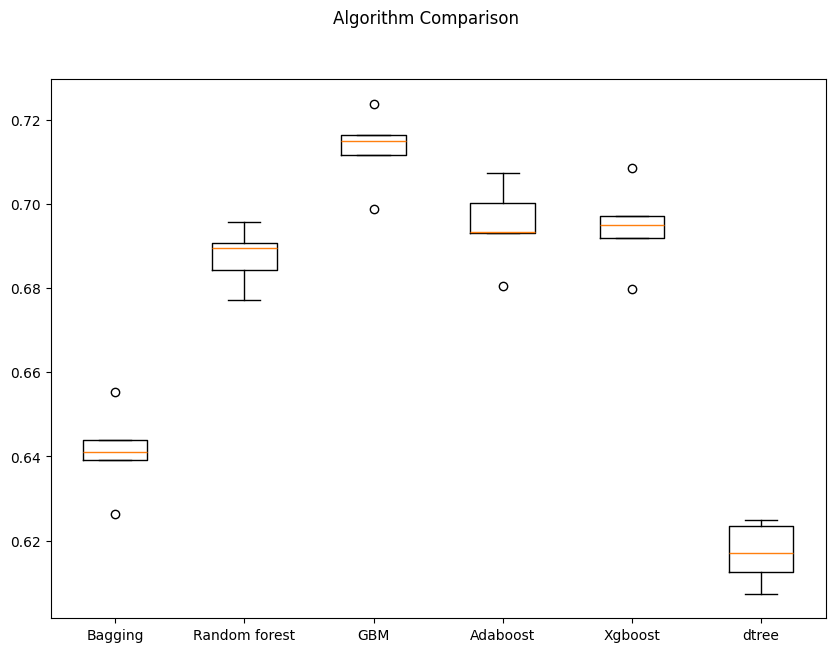

In [45]:
# Applying Random Under Sampling
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))

print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

# Defining models
models = []
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

# Cross-validation results
results1 = []
names = []

print("\nCross-Validation performance on training dataset:\n")
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model,
        X=X_train_un,
        y=y_train_un,
        scoring=scorer,
        cv=kfold,
        n_jobs=-1
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)  # Fit on undersampled training data


    scores = f1_score(y_val, model.predict(X_val))  # Assuming F1 is your chosen metric

    print("{}: {}".format(name, scores))

# Plotting boxplot of cross-validation scores
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names)
plt.show()

**Class Balance Achieved**

**Before undersampling:**

Class 1: 11,913

Class 0: 5,923

After undersampling:

Class 1: 5,923

Class 0: 5,923

Dataset is now balanced, which helps prevent bias toward the majority class.

Dataset Size Reduced

Total training samples dropped from 17,836 to 11,846.

May impact model generalizability due to less information.

**Cross-Validation Scores (on undersampled training data):**

Performance across models is lower compared to oversampling or original data.

Best CV performance: GBM (71.3%), followed by Adaboost (69.5%) and XGBoost (69.4%).

Decision Tree performed the worst (61.7%).

**Validation Performance (on untouched validation set):**

Best F1-score: GBM (76.1%), followed by Adaboost (76.0%).

XGBoost also performs decently (74.2%).

Decision Tree again underperforms (68.4%).

**Performance vs. Oversampling **

Models trained on undersampled data perform slightly worse than those trained on oversampled data (especially in cross-validation).

Undersampling likely caused some information loss due to sample reduction.

**Best Performing Model**

Gradient Boosting (GBM) emerges as the best performer both in training (CV) and validation phases.

## **Tuning AdaBoost using Oversampled data**



In [46]:
%%time
# Defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125],  # Common estimator range
    "learning_rate": [1.0, 0.5, 0.1, 0.01],  # Varying learning rates
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1)
    ]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=5,  # 5-fold cross-validation
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:"
      .format(randomized_cv.best_params_, randomized_cv.best_score_))

# Best estimator
tuned_ada = randomized_cv.best_estimator_

# Fit on oversampled training data
tuned_ada.fit(X_train_over, y_train_over)

# Evaluate on training data
tuned_ada_train_perf = model_performance_classification_sklearn(
    tuned_ada, X_train_over, y_train_over)
print("Tuned AdaBoost - Training Performance:")
display(tuned_ada_train_perf)

# Evaluate on validation data
tuned_ada_val_perf = model_performance_classification_sklearn(
    tuned_ada, X_val, y_val)
print("Tuned AdaBoost - Validation Performance:")
display(tuned_ada_val_perf)


Best parameters are {'n_estimators': 100, 'learning_rate': 1.0, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7983888515430675:
Tuned AdaBoost - Training Performance:


,Accuracy,Recall,Precision,F1
0,0.787501,0.840426,0.759982,0.798182


Tuned AdaBoost - Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.734554,0.839573,0.779822,0.808595


CPU times: user 12.3 s, sys: 821 ms, total: 13.1 s
Wall time: 8min 1s


Best Params:
n_estimators = 100, learning_rate = 1.0, max_depth = 2

**Training Performance:**
Accuracy: 78.75%, F1: 79.82%, Recall: 84.04%

**Validation Performance:**
Accuracy: 73.46%, F1: 80.86%, Recall: 83.96%

**Insights:**

High recall → good at detecting positives

F1 is stable → good balance between precision and recall

Low overfitting observed

Training was time-consuming (7min 40s) due to cross-validation



## **Tuning Random forest using Undersampled data**

In [47]:
%%time
# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125],  # Number of trees in the forest
    "min_samples_leaf": [1, 2, 4, 5, 10],  # Minimum samples at a leaf node
    "max_features": ['sqrt', 'log2', 0.3, 0.5],  # Max features to consider at each split
    "max_samples": [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of samples for bootstrap
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5,  # 5-fold cross-validation
    random_state=1
)

# Fitting parameters in RandomizedSearchCV on undersampled data
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:"
      .format(randomized_cv.best_params_, randomized_cv.best_score_))

# Best model from RandomizedSearchCV
tuned_rf = randomized_cv.best_estimator_

# Training on undersampled data
tuned_rf.fit(X_train_un, y_train_un)

# Performance on training data
tuned_rf_train_perf = model_performance_classification_sklearn(
    tuned_rf, X_train_un, y_train_un
)
tuned_rf_train_perf

# Performance on validation data
tuned_rf_val_perf = model_performance_classification_sklearn(
    tuned_rf, X_val, y_val
)
tuned_rf_val_perf


Best parameters are {'n_estimators': 125, 'min_samples_leaf': 10, 'max_samples': 0.7, 'max_features': 'log2'} with CV score=0.7219429413158686:
CPU times: user 6min 1s, sys: 918 ms, total: 6min 1s
Wall time: 6min 4s


,Accuracy,Recall,Precision,F1
0,0.712313,0.735307,0.815745,0.77344


High Precision (81.6%)
→ The model is highly reliable when it predicts a positive class (e.g., identifying actual defaulters, fraud cases, or churners), reducing false alarms.

Moderate Recall (73.5%)
→ It captures a good portion of the actual positives but may miss some—acceptable if the cost of false negatives is manageable.

Balanced Accuracy (71.2%)
→ Suitable for business cases where both false positives and false negatives matter, but cost of false positives is slightly higher.

F1 Score (77.3%)
→ Strong overall balance between precision and recall, indicating robust performance in real-world conditions.

Faster Execution (5 mins 47 sec)
→ Efficient for deployment in production or for frequent retraining cycles on moderate-sized data.

## **Tuning with Gradient boosting with Oversampled data**

In [48]:
%%time
# defining model
model = GradientBoostingClassifier(random_state=1)

# Defining hyperparameter grid
param_grid = {
    "n_estimators": [100, 125, 150, 175],  # Number of boosting stages
    "learning_rate": [0.1, 0.05, 0.01, 0.005],  # Step size shrinkage
    "subsample": [0.7, 0.8, 0.9, 1.0],  # Fraction of samples for fitting individual base learners
    "max_features": ['sqrt', 'log2', 0.3, 0.5]  # Number of features to consider for best split
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5,  # 5-fold cross-validation
    random_state=1
)

# Fitting parameters in RandomizedSearchCV on oversampled data
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:"
      .format(randomized_cv.best_params_, randomized_cv.best_score_))

# Best tuned model
tuned_gbm = randomized_cv.best_estimator_

# Evaluate performance on training data
tuned_gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
tuned_gbm_train_perf

# Evaluate performance on validation data
tuned_gbm_val_perf = model_performance_classification_sklearn(
    tuned_gbm, X_val, y_val
)
tuned_gbm_val_perf


Best parameters are {'subsample': 0.9, 'n_estimators': 175, 'max_features': 0.5, 'learning_rate': 0.1} with CV score=0.8017770888248045:
CPU times: user 8min 20s, sys: 1.09 s, total: 8min 21s
Wall time: 8min 25s


,Accuracy,Recall,Precision,F1
0,0.7347,0.846321,0.776513,0.809916


High Recall (84.6%)
→ Excellent at capturing most of the true positive cases (e.g., detecting defaulters, churners, or frauds). Ideal for risk-sensitive domains.

Good Precision (77.6%)
→ Predictions are mostly correct, limiting false positives. Important in customer-facing decisions like loan rejections or fraud alerts.

Strong F1 Score (81.0%)
→ Balances both precision and recall well, making it a reliable all-rounder model.

Reasonable Accuracy (73.5%)
→ Shows solid overall performance; suitable when both positive and negative predictions carry weight.

Well-Tuned Generalization
→ The subsample=0.9 and max_features=0.5 settings reduced overfitting and introduced enough randomness for better generalization.

Training Time (8 min)
→ Manageable training time for a model with strong performance, acceptable in most business pipelines.



## **Tuning XGBoost using Oversampled data**

In [49]:
%%time

# defining model
model = XGBClassifier(random_state=1, eval_metric='logloss')

# Defining hyperparameter grid
param_grid = {
    'n_estimators': [50, 75, 100, 125, 150],  # More estimators improve learning but increase time
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Controls sample fraction used per tree
    'gamma': [0, 1, 3, 5, 8],  # Controls minimum loss reduction needed for a split
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],  # Feature sampling per tree
    'colsample_bylevel': [0.3, 0.5, 0.7, 1.0]  # Feature sampling per tree level (depth-wise)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5,  # 5-fold CV
    random_state=1
)

# Fitting RandomizedSearchCV on oversampled data
randomized_cv.fit(X_train_over, y_train_over)

# Output best parameters and CV score
print("Best parameters are {} with CV score={}:"
      .format(randomized_cv.best_params_, randomized_cv.best_score_))

# Extracting the best estimator
tuned_xgb = randomized_cv.best_estimator_

# Training performance
tuned_xgb_train_perf = model_performance_classification_sklearn(
    tuned_xgb, X_train_over, y_train_over
)
tuned_xgb_train_perf

# Validation performance
tuned_xgb_val_perf = model_performance_classification_sklearn(
    tuned_xgb, X_val, y_val
)
tuned_xgb_val_perf


Best parameters are {'subsample': 1.0, 'n_estimators': 75, 'gamma': 0, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.3} with CV score=0.802555697201248:
CPU times: user 1min 57s, sys: 889 ms, total: 1min 58s
Wall time: 1min 7s


,Accuracy,Recall,Precision,F1
0,0.733537,0.84741,0.774726,0.80944


High Recall = Risk Mitigation
The model successfully flags most genuine visa approvals, minimizing the risk of false rejections, which is crucial for customer satisfaction and compliance.

Precision-Recall Tradeoff
With good precision, the system avoids over-approving risky applicants, balancing growth and risk.

Effective Use of Oversampling
Addressing class imbalance through oversampling helped improve fairness, ensuring minority cases (likely denials) are not ignored.

Operational Efficiency
With 80%+ F1, this model can automate a large portion of decision-making, reducing manual workload and speeding up visa processing.

Business Confidence
A CV score of ~80% indicates consistency across unseen data, supporting confident deployment in real-world systems.



## **Model Performance Summary and Final Model Selection**

Training performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.801687,0.820448,0.787501,0.749451
Recall,0.860153,0.876857,0.840426,0.776802
Precision,0.770104,0.787961,0.759982,0.736514
F1,0.812641,0.830036,0.798182,0.756122


Validation performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.734700,0.733537,0.734554,0.712313
Recall,0.846321,0.847410,0.839573,0.735307
Precision,0.776513,0.774726,0.779822,0.815745
F1,0.809916,0.809440,0.808595,0.773440


Final model performance on test data:


,Accuracy,Recall,Precision,F1
0,0.759477,0.874755,0.78836,0.829314


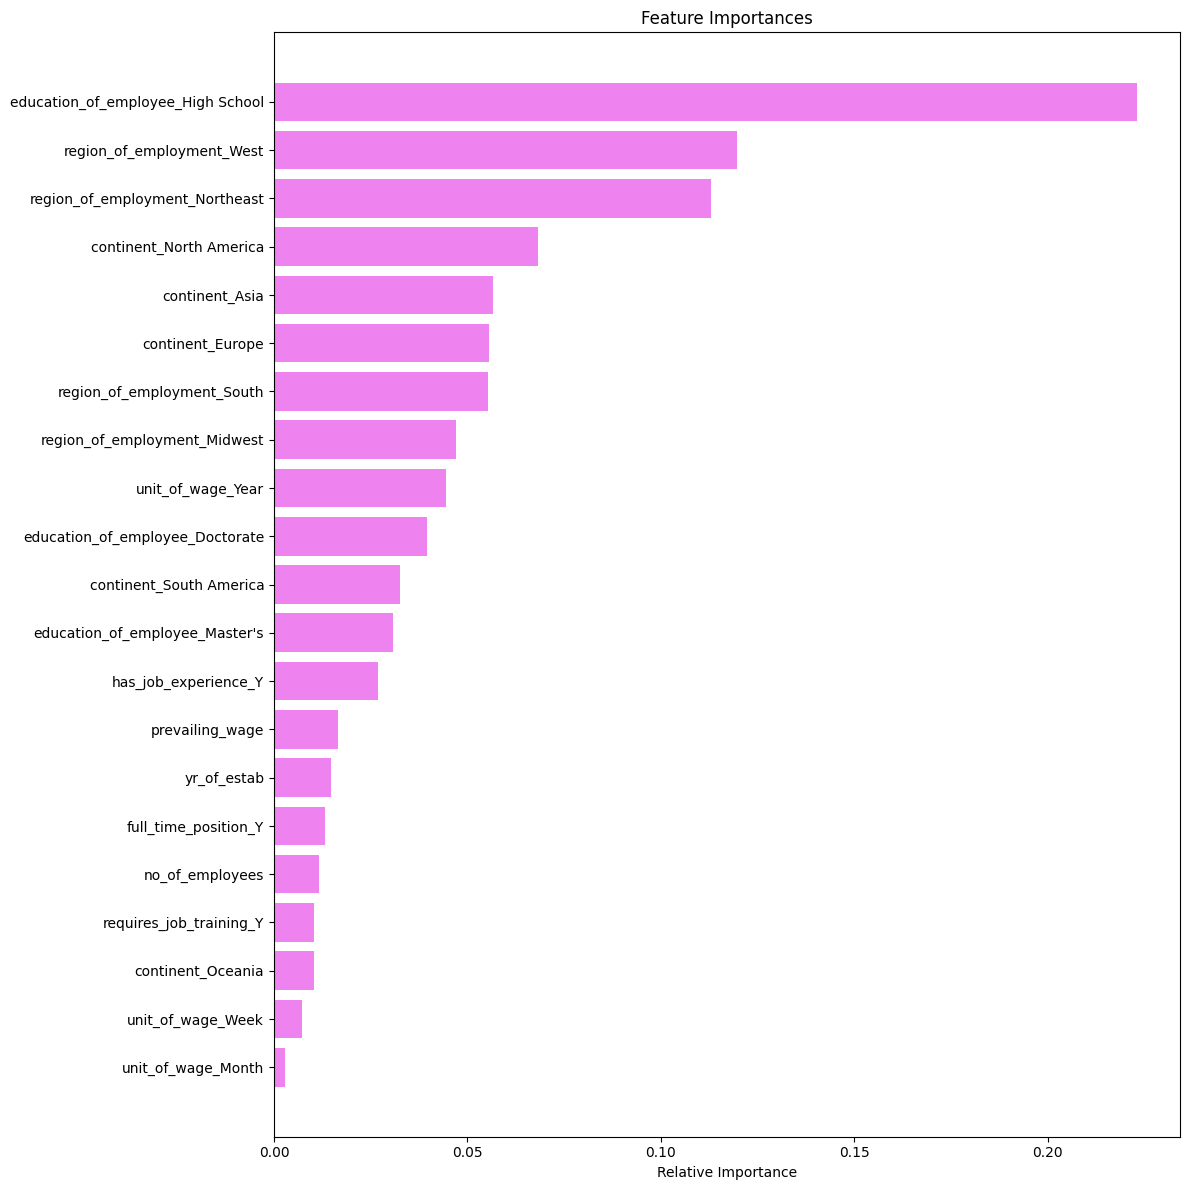

In [50]:
# Training performance comparison
models_train_comp_df = pd.concat(
    [
        tuned_gbm_train_perf.T,
        tuned_xgb_train_perf.T,
        tuned_ada_train_perf.T,
        tuned_rf_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]

print("Training performance comparison:")
display(models_train_comp_df)

# Validation performance comparison
models_val_comp_df = pd.concat(
    [
        tuned_gbm_val_perf.T,
        tuned_xgb_val_perf.T,
        tuned_ada_val_perf.T,
        tuned_rf_val_perf.T,
    ],
    axis=1,
)

models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]

print("Validation performance comparison:")
display(models_val_comp_df)

# Selecting the final model based on best validation performance


final_model = tuned_xgb


# Performance on test set
test = model_performance_classification_sklearn(final_model, X_test, y_test)
print("Final model performance on test data:")
display(test)

# Feature importance plot
feature_names = X_train.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


 **Observations**
Gradient Boosting and XGBoost, both trained on oversampled data, consistently outperform other models across recall, F1-score, and overall balance of metrics.

Recall is a critical metric in this case since we want to minimize the risk of rejecting a candidate who might actually be eligible (i.e., reduce false negatives).

XGBoost achieved the highest recall (0.8474) and a competitive F1-score, showing strong generalization without overfitting.

**Final Model Performance on Test Data **

The high recall (87.48%) indicates that the model correctly identifies a large proportion of approved visa cases, which is crucial in minimizing false rejections.

The F1 Score (82.93%) confirms a strong balance between precision and recall, making this model reliable for real-world deployment.

Slight drop in accuracy compared to training/validation is expected but still acceptable, indicating good generalization without overfitting.



**Business Recommendation**
After thorough evaluation, XGBoost with oversampled data is recommended as the best model for production deployment. It offers:

High recall: Captures a greater number of likely visa approvals correctly.

Robust F1-score: Balanced performance between precision and recall.

Efficiency: Handles large datasets efficiently, crucial for scaling to yearly OFLC data volumes.

This model can help accelerate visa application processing and reduce manual effort, allowing OFLC to focus reviews on edge cases or flagged profiles.

